In [1]:
import numpy as np
import matplotlib.pyplot as plt

构造随机但符合标准正态分布的$500$个随机数，用来模拟随机噪声

In [2]:
n, mu, sigma = 500, 0, 1
r = np.random.normal(mu, sigma, n)
mean = np.mean(r)

$c_k$表示间隔为$k$的样本自协方差

$$c_k = \frac{1}{n} \sum \limits _{i=1} ^{n-k} (r_t - \mu) (r_{t+k} - \mu)$$

其中$\{r_t\}$表示时间序列，之所以除以$n$是因为自由度为$n$，因为$r_t$和$r_{t+k}$减去的样本均值都不能通过$n-k$个样本推导出来

In [3]:
def c_(k):
    # sample autocovariance of lag k (degree of freedom is n)
    c_k = 1 / n * sum([(r[t] - mean) * (r[t+k] - mean) for t in range(n-k)])
    return c_k

弱平稳性：
- 对所有时刻$t$，有$\rm{E}(r_t) = \mu$
- 对所有时刻$t$和任意时间间隔$k$，两个子序列之间的协方差是一个只和间隔$k$有关的变量

整体自相关系数
$$\rho_k = \frac{Cov(r_t, r_{t - k})}{\sigma(r_t)\sigma(r_{t - k})} = \frac{Cov(r_t, r_{t-k})}{\sigma(r_t)\sigma(r_t)} =\frac{\gamma _k}{\gamma_0}$$
因为假设时间序列是满足弱平稳性的，所以两个子序列的协方差是一个只和时间间隔$k$有关的变量$\gamma_k$

样本自相关系数
$$C_k = \frac{c_k}{c_0}$$
整体自相关系数其实可以看成两个在$n$维空间的向量之间的余弦相似度，取值范围$[-1, 1]$，从负相关到正相关

In [4]:
c_0 = c_(0)
C_ks = []
for k in range(n):
    c_k = c_(k)
    # C_k is sample autocorrelation of lag k
    C_k = c_k / c_0
    C_ks.append(C_k)

从下面的图中可以看出（一幅图是我用公式计算的不同间隔$k$的自相关系数图，另一幅是用matplotlib自己生成的自相关图）可以看出白噪音的时间序列，对于任意时间间隔不为$0$的自相关系数都为$0$(置信区间为$95\%$)，我们不能在小于$5\%$的显著性水平`p-value`下拒绝该假设。

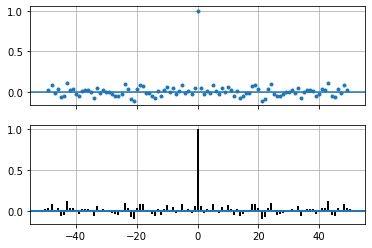

In [5]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex="all")

max_lags = 50
ax1.plot([i for i in range(-max_lags+1, max_lags)], list(reversed(C_ks[1:max_lags])) + C_ks[:max_lags], '.')
ax1.axhline(y=0, linestyle='-')
ax1.grid(True)
ax2.acorr(r, usevlines=True, normed=True, maxlags=max_lags, lw=2)
ax2.grid(True)

plt.show()

> 如果残差（指原始时间序列，比如原始收益率曲线，和我们模型拟合的曲线之间的差值）的相关图和上面这个图相似，则可以认为残差是一个随机噪声，而模型已经很好的捕捉了原始时间序列中的自相关性；
如果残差的相关图体现了额外的自相关性，它们将为我们改进已有的模型提供依据，因为这些额外的自相关说明已有模型没有考虑原始时间序列在某些特定间隔上的自相关。